In [1]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Root directory where Fly1, Fly2, etc. are located
base_path = Path("C:/Users/HugoMarques/Documents/Projects/TeachingLab/FlyMorrisMaze/HeatingTest")

# Dictionary to hold fly DataFrames
fly_data = {}

# Loop through all "Fly*" subfolders
for fly_folder in sorted(base_path.glob("Fly*")):
    if fly_folder.is_dir():
        dfs = []
        csv_files = sorted(fly_folder.glob("*.csv"))
        
        for trial_number, file in enumerate(csv_files, start=1):
            df = pd.read_csv(file)
            print(f"Processing {file.name} for {fly_folder.name}, Trial {trial_number}")
            df['trial'] = trial_number  # Add trial number
            dfs.append(df)
        
        # Concatenate all trials for this fly
        full_df = pd.concat(dfs, ignore_index=True)
        full_df.columns = full_df.columns.str.strip()  # Strip column names of whitespace
        print(full_df.columns)

        # Store in dictionary under folder name (e.g., "Fly1")
        fly_data[fly_folder.name] = full_df

# Example: access data for Fly1
print(fly_data["Fly1"].head())

Processing BehaviorLog2025-08-04T11_16_01.csv for Fly1, Trial 1
Processing BehaviorLog2025-08-04T11_39_11.csv for Fly1, Trial 2
Processing BehaviorLog2025-08-04T11_57_12.csv for Fly1, Trial 3
Processing BehaviorLog2025-08-04T13_00_27.csv for Fly1, Trial 4
Processing BehaviorLog2025-08-04T13_52_01.csv for Fly1, Trial 5
Processing BehaviorLog2025-08-04T14_20_25.csv for Fly1, Trial 6
Processing BehaviorLog2025-08-04T14_47_24.csv for Fly1, Trial 7
Index(['Timestamp', 'dX', 'dY', 'Laser', 'trial'], dtype='object')
Processing BehaviorLog2025-08-05T09_39_29.csv for Fly2, Trial 1
Processing BehaviorLog2025-08-05T10_02_21.csv for Fly2, Trial 2
Processing BehaviorLog2025-08-05T10_49_52.csv for Fly2, Trial 3
Processing BehaviorLog2025-08-05T11_18_16.csv for Fly2, Trial 4
Processing BehaviorLog2025-08-05T11_56_22.csv for Fly2, Trial 5
Processing BehaviorLog2025-08-05T12_40_05.csv for Fly2, Trial 6
Processing BehaviorLog2025-08-05T13_00_07.csv for Fly2, Trial 7
Index(['Timestamp', 'dX', 'dY', 'Lase

In [ ]:
# Plot trial

fly = 'Fly1'
trial = 2
trial_mask = fly_data[fly]['trial'] == trial
df = fly_data[fly][trial_mask]


plt.figure(figsize=(8, 6))
plt.plot(df['Timestamp'], df['dX'], label='dX')
plt.plot(df['Timestamp'], df['dY'], label='dy')
plt.plot(df['Timestamp'], df['Laser'], label='laser')
plt.draw()


In [4]:
# Compute linear and angular speed histograms for each laser power

n_flies = len(fly_data)
laser_powers = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.3]

fly_hist = {}  # initialize an empty dictionary
hist_edges = np.linspace(-0.8, 0.8, 51)
hist_centers = 0.5 * (hist_edges[1:] + hist_edges[:-1])

for f in range(n_flies):
    fly = list(fly_data.keys())[f]
    df = fly_data[fly]
    fly_hist[fly] = {}  # initialize a dictionary for each fly
        
    for lp in range(len(laser_powers)):
        
        trial_mask = df['trial'] == lp + 1
        trial_df = df[trial_mask]
        
        # Create masks for laser ON and OFF
        laser_off = trial_df['Laser'] == 0
        laser_on = trial_df['Laser'] == 1
        
        fly_hist[fly][lp] = {}  # per laser power
       
       
        hist_dX, _ = np.histogram(trial_df[laser_on]['dX'], bins=hist_edges, density=True)
        hist_dY, _ = np.histogram(trial_df[laser_on]['dY'], bins=hist_edges, density=True)
        fly_hist[fly][lp]['Laser ON'] = {
           'dX': hist_dX,
           'dY': hist_dY
        }

        hist_dX, _ = np.histogram(trial_df[laser_off]['dX'], bins=hist_edges, density=True)
        hist_dY, _ = np.histogram(trial_df[laser_off]['dY'], bins=hist_edges, density=True)
        
        fly_hist[fly][lp]['Laser OFF'] = {
            'dX': hist_dX,
            'dY': hist_dY
        }
                
print(fly_hist)

{'Fly1': {0: {'Laser ON': {'dX': array([1.24778963e-02, 2.49557926e-02, 3.74336889e-02, 5.64476261e-02,
       7.24906356e-02, 7.30848212e-02, 1.16460365e-01, 1.36662674e-01,
       1.61024281e-01, 1.59835910e-01, 1.74096363e-01, 1.52111498e-01,
       1.61618466e-01, 1.73502177e-01, 2.07964938e-01, 2.51340483e-01,
       2.81049759e-01, 3.44627612e-01, 3.93350826e-01, 4.81884471e-01,
       6.03692507e-01, 7.99773734e-01, 1.21510943e+00, 2.25849923e+00,
       5.43976860e+00, 5.43679767e+00, 2.47537695e+00, 1.75819501e+00,
       1.59360561e+00, 1.39930694e+00, 1.18242922e+00, 1.01962238e+00,
       7.23717985e-01, 5.15158861e-01, 3.86220600e-01, 2.77484646e-01,
       2.06182382e-01, 1.47358013e-01, 1.15271994e-01, 6.71429658e-02,
       3.03034624e-02, 3.44627612e-02, 3.20860191e-02, 2.02023083e-02,
       1.78255661e-02, 1.06953397e-02, 3.56511323e-03, 3.56511323e-03,
       2.37674215e-03, 1.78255661e-03]), 'dY': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+0

7


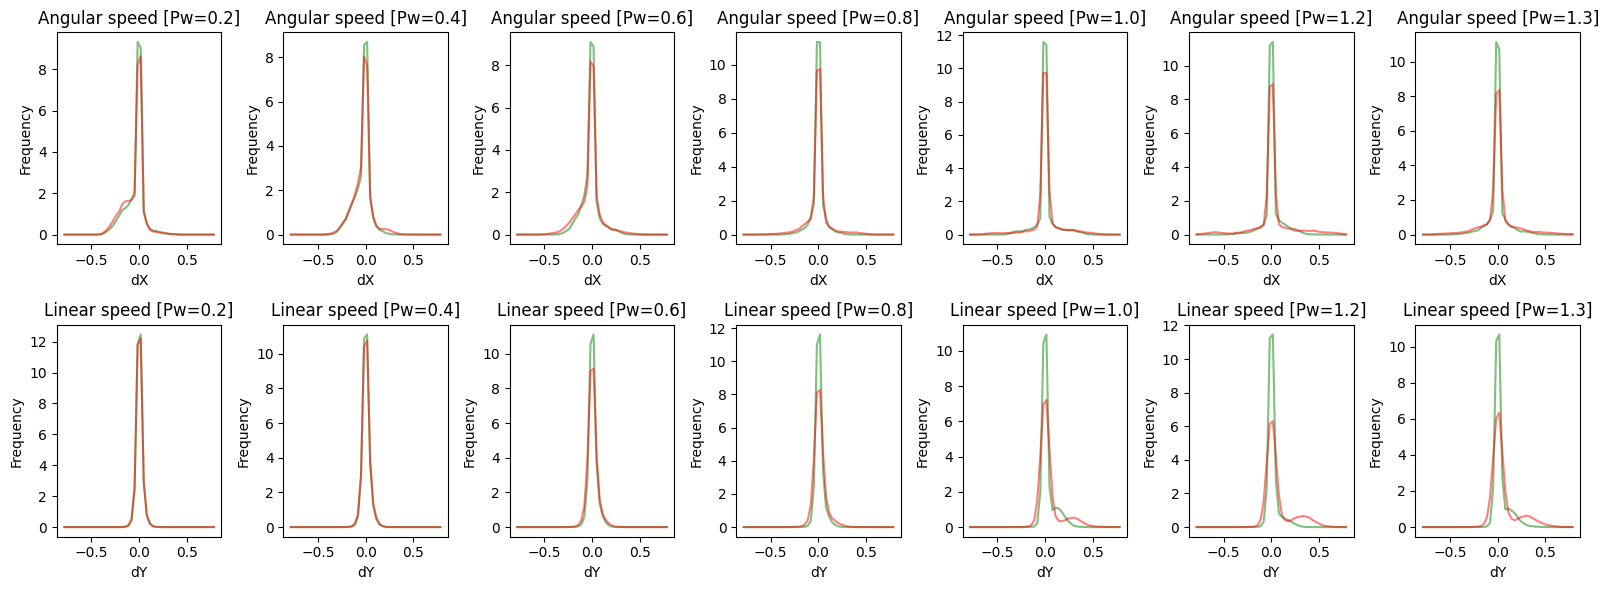

In [7]:
# Compute linear and angular speed distributions for each laser power for a specific fly


fly = 'Fly5'
print(len(laser_powers))

fig, axs = plt.subplots(2, 7, figsize=(16, 6))  # 1 row, 2 columns

for i in range(len(laser_powers)):
    #trial_mask = fly_data[fly]['trial'] == i + 1
    fhist = fly_hist[fly][i]

    # Get rows where Laser is 0 or 1
    laser_off = df['Laser'] == 0
    laser_on = df['Laser'] == 1

    # Plot Angular speed
    axs[0][i].plot(hist_centers, fhist['Laser OFF']['dX'], alpha=0.5, label='Laser OFF', color='green')
    axs[0][i].plot(hist_centers, fhist['Laser ON']['dX'], alpha=0.5, label='Laser ON', color='red')
    axs[0][i].set_xlabel('dX')
    axs[0][i].set_ylabel('Frequency')
    axs[0][i].set_title('Angular speed [Pw=' + str(laser_powers[i]) + ']')
    #axs[0][i].legend()

    # Plot Forward speed
    axs[1][i].plot(hist_centers, fhist['Laser OFF']['dY'], alpha=0.5, label='Laser OFF', color='green')
    axs[1][i].plot(hist_centers, fhist['Laser ON']['dY'], alpha=0.5, label='Laser ON', color='red')
    axs[1][i].set_xlabel('dY')
    axs[1][i].set_ylabel('Frequency')
    axs[1][i].set_title('Linear speed [Pw=' + str(laser_powers[i]) + ']')
    #axs[1][i].legend()

plt.tight_layout()
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.randn(10, 1, 5, 5)

plt.imshow(x[0,0].numpy(), cmap='gray')
plt.show()


In [ ]:
import sys
print(sys.executable)
import matplotlib
print(matplotlib.get_backend())
